In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
data = pd.read_csv('../../communal/Ames_Housing_Price_Data_cleaned_2.csv')
lat_long = pd.read_csv('../data/address_lat_long.csv')
data = data.merge(lat_long, how = 'left', left_on ='Prop_Addr', right_on = 'address')

In [12]:
def distance(row, other_location):
    neighborhoodLocation = Point(row['lat'],row['long'])
    return round(geodesic(neighborhoodLocation,other_location).miles,2)

In [13]:
data.columns

Index(['Unnamed: 0_x', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'PID', 'GrLivArea',
       'SalePrice_x', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea_x',
       ...
       'NmbrBRs', 'Short_hand', 'Full_Name', 'lat_x', 'long_x', 'distToUni',
       'Unnamed: 0_y', 'address', 'lat_y', 'long_y'],
      dtype='object', length=152)

In [10]:
sns.boxplot(x = 'dBin', y = 'SalePrice_x',data = data)
plt.figure(figsize=[40,100]) 

ValueError: Could not interpret input 'dBin'

In [11]:
data[data['dBin'] == 3].groupby('Neighborhood_x').size()

KeyError: 'dBin'

<AxesSubplot:xlabel='dBin', ylabel='SalePrice_x'>

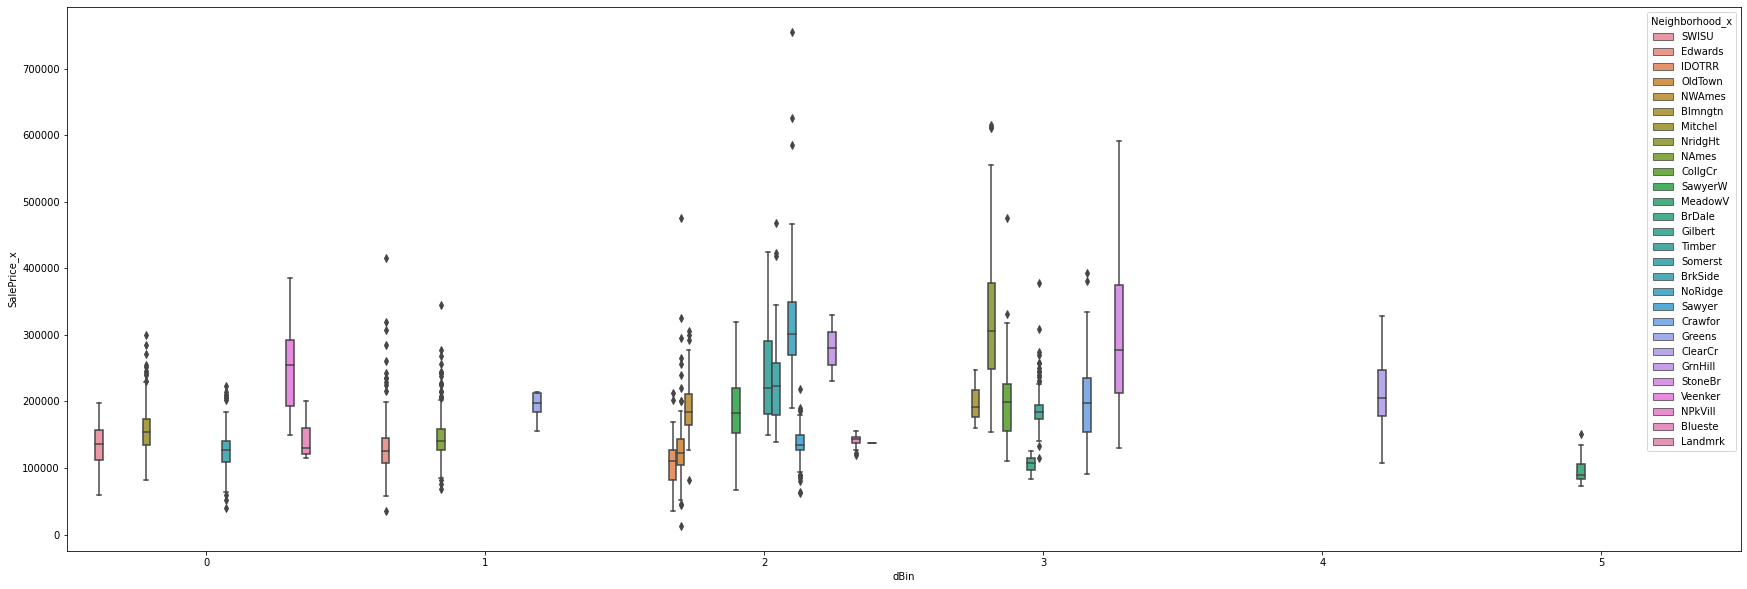

In [116]:
plt.rcParams["figure.figsize"] = (30,10)
sns.boxplot(x = 'dBin', y = 'SalePrice_x',hue = 'Neighborhood_x', data = data)


In [117]:
data.groupby(['dBin','Neighborhood_x'])['SalePrice_x'].mean()

dBin  Neighborhood_x
0     Blueste           143590.000000
      BrkSide           126116.105769
      Mitchel           162382.380952
      SWISU             133575.809524
      Veenker           251263.043478
1     Edwards           132972.609467
      Greens            193531.250000
      NAmes             144925.362110
2     GrnHill           280000.000000
      IDOTRR            107840.300000
      Landmrk           137000.000000
      NPkVill           140971.739130
      NWAmes            190018.588710
      NoRidge           326114.298507
      OldTown           126886.686636
      Sawyer            137446.865248
      SawyerW           187548.473684
      Somerst           228430.655172
      Timber            242909.518519
3     Blmngtn           196237.173913
      BrDale            106491.666667
      CollgCr           198067.408333
      Crawfor           201648.638298
      Gilbert           189284.144828
      NridgHt           317586.682927
      StoneBr           30762

In [120]:
data['closeToUni'] = data.apply(lambda row: 1 if row['distToUni'] <1 else 0,axis = 1)

<AxesSubplot:xlabel='distToUni', ylabel='SalePrice_x'>

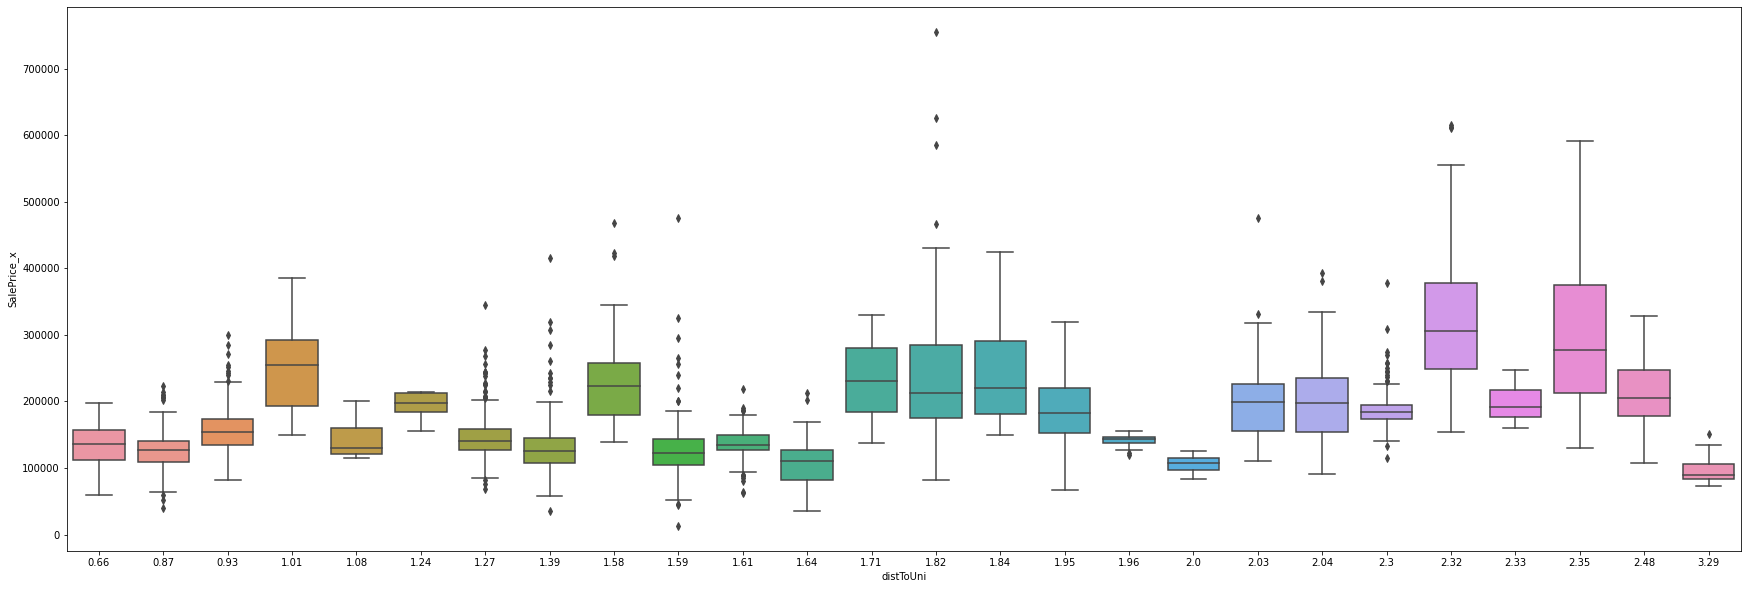

In [128]:
sns.boxplot(x = 'distToUni', y = 'SalePrice_x',data = data)

float

In [134]:
np.isnan(['sr'])

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''